In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [24]:
df=pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
df.shape

(300153, 12)

In [26]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [27]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [28]:
df.value_counts()


Unnamed: 0  airline   flight   source_city  departure_time  stops  arrival_time   destination_city  class     duration  days_left  price
300152      Vistara   UK-822   Chennai      Morning         one    Evening        Hyderabad         Business  10.08     49         81585    1
0           SpiceJet  SG-8709  Delhi        Evening         zero   Night          Mumbai            Economy   2.17      1          5953     1
1           SpiceJet  SG-8157  Delhi        Early_Morning   zero   Morning        Mumbai            Economy   2.33      1          5953     1
2           AirAsia   I5-764   Delhi        Early_Morning   zero   Early_Morning  Mumbai            Economy   2.17      1          5956     1
3           Vistara   UK-995   Delhi        Morning         zero   Afternoon      Mumbai            Economy   2.25      1          5955     1
                                                                                                                                           ..
13         

In [29]:
df['class'] = df['class'].replace({'Economy': 1, 'Business': 0}).astype(int)
df['class']

C:\Users\manos\AppData\Local\Temp\ipykernel_19996\819302515.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Economy': 1, 'Business': 0}).astype(int)


0         1
1         1
2         1
3         1
4         1
         ..
300148    0
300149    0
300150    0
300151    0
300152    0
Name: class, Length: 300153, dtype: int64

In [30]:
df.drop(columns='Unnamed: 0',inplace=True)

In [31]:
df.drop(columns='flight',inplace=True)

In [32]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [33]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,2.33,1,5955


In [34]:
numeric_cols=df.select_dtypes(include=['int64','float64'])
categorical_cols=df.select_dtypes(exclude=['int64','float64'])
print("numeric_cols=",numeric_cols.columns)
print("categorical_cols=",categorical_cols.columns)

numeric_cols= Index(['class', 'duration', 'days_left', 'price'], dtype='object')
categorical_cols= Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city'],
      dtype='object')


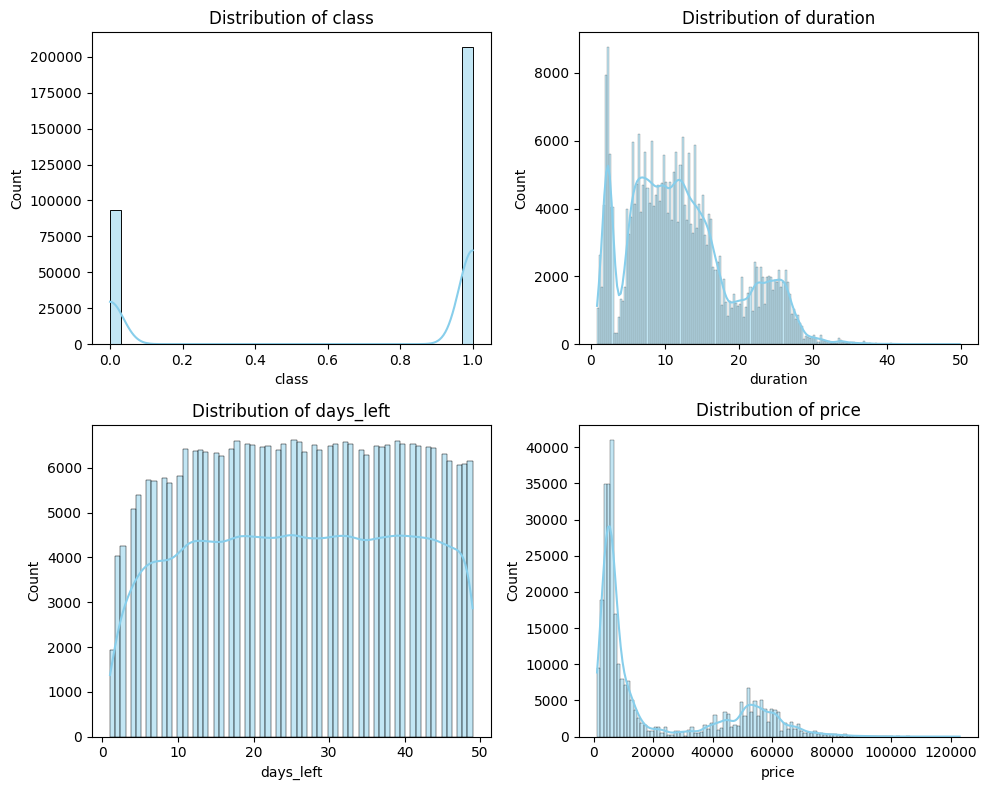

class       -0.814250
duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['class', 'duration', 'days_left', 'price']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
df[numeric_cols].skew()

Skew after log: 0.4045182534105094


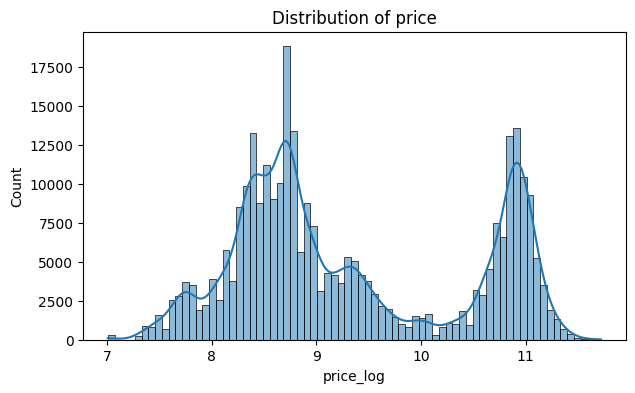

In [36]:
import numpy as np

df['price_log'] = np.log1p(df['price'])  
from scipy.stats import skew
print("Skew after log:", skew(df['price_log']))
plt.figure(figsize=(7,4))
sns.histplot(df['price_log'],kde=True)
plt.title("Distribution of price")
plt.show()

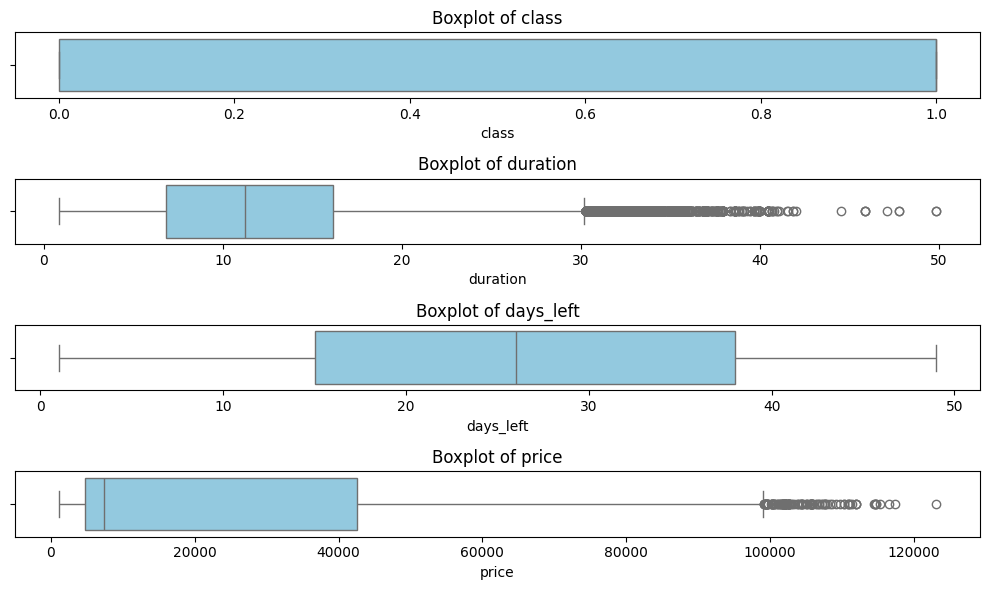

In [37]:

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


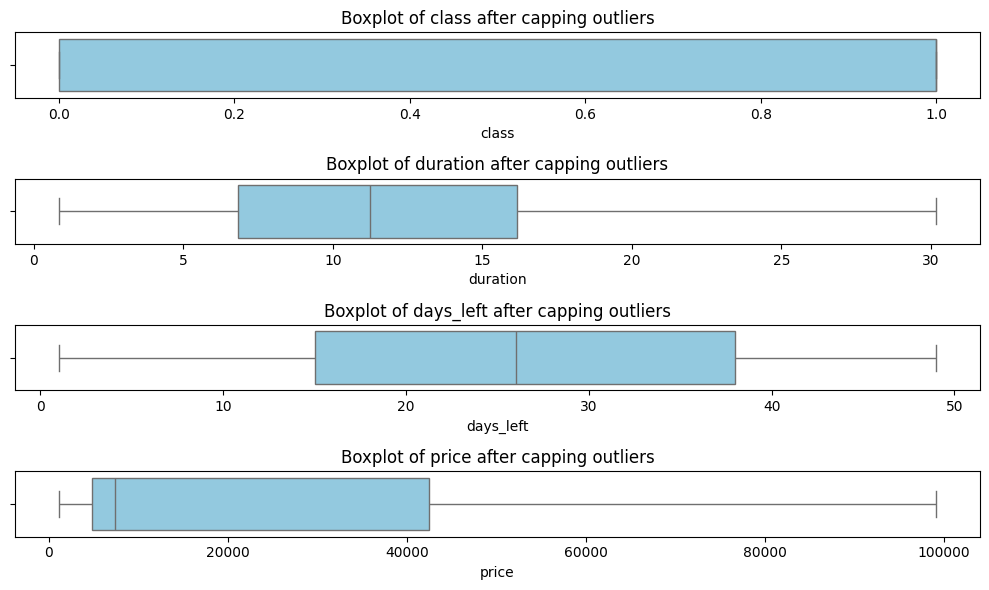

In [38]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col} after capping outliers')
    plt.tight_layout()

plt.show()

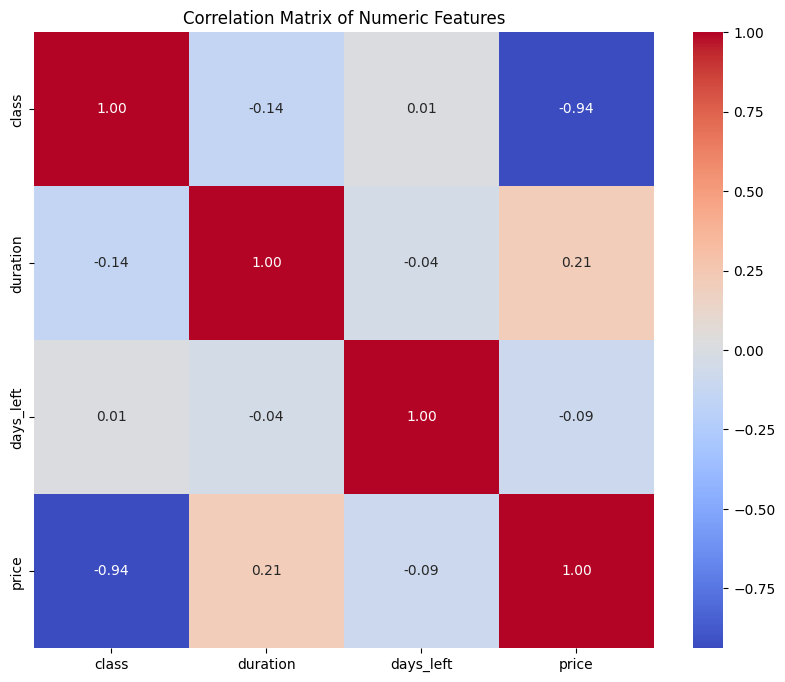

In [39]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df.drop(columns=['price'])
y = df['price']


categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=20, random_state=42),  # fewer trees
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=20, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=20, random_state=42)
}

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))


results_df = pd.DataFrame(results, columns=['Model','MAE','RMSE','R2_Score']).sort_values(by='R2_Score', ascending=False)
print(results_df)


best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

               Model          MAE         RMSE  R2_Score
3      Random Forest     0.195902     2.205869  1.000000
2      Decision Tree     7.547513    14.530969  1.000000
5           AdaBoost  1217.286918  1483.326376  0.995727
4  Gradient Boosting  2425.575053  2885.955807  0.983827
0  Linear Regression  3740.436170  5669.275859  0.937589
1   Ridge Regression  3740.228469  5669.384193  0.937586
